#TensorFlow versions in Colab


##Background
Colab has two versions of TensorFlow pre-installed: a 2.x version and a 1.x version. Colab uses TensorFlow 2.x by default, though you can switch to 1.x by the method shown below.


##Specifying the TensorFlow version

Running `import tensorflow` will import the default version (currently 2.x). You can use 1.x by running a cell with the `tensorflow_version` magic **before** you run `import tensorflow`.

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


Once you have specified a version via this magic, you can run `import tensorflow` as normal and verify which version was imported as follows:

In [4]:
import tensorflow as tf
print(tf.__version__)

1.15.2


If you want to switch TensorFlow versions after import, you **will need to restart your runtime** with 'Runtime' -> 'Restart runtime...' and then specify the version before you import it again.

## Avoid Using ``pip install`` with GPUs and TPUs

We recommend against using ``pip install`` to specify a particular TensorFlow version for both GPU and TPU backends. Colab builds TensorFlow from source to ensure compatibility with our fleet of accelerators. Versions of TensorFlow fetched from PyPI by ``pip`` may suffer from performance problems or may not work at all.

In [5]:
hello = tf.constant('Hello world!')

In [6]:
sess = tf.Session()

result = sess.run(hello)
print(result)

sess.close()

b'Hello world!'


In [7]:
with tf.Session() as sess:
    result = sess.run(hello)
    print(result)

b'Hello world!'


In [8]:
a = tf.constant(2)
b = tf.constant(3)

c = tf.constant([1, 2, 3, 4])
d = tf.constant([2, 3, 4, 5])

In [9]:
with tf.Session() as sess:
    print('a = {}, b = {}, c = {}, d = {}\n'.format(
        sess.run(a), sess.run(b),
        sess.run(c), sess.run(d)
    ))
    
    print('a + b = {}\n'
          'a * b = {}'.format(sess.run(a + b), sess.run(a * b)))
    
    print('c + d = {}\n'
          'c * d = {}'.format(sess.run(c + d), sess.run(c * d)))

a = 2, b = 3, c = [1 2 3 4], d = [2 3 4 5]

a + b = 5
a * b = 6
c + d = [3 5 7 9]
c * d = [ 2  6 12 20]


In [11]:
a = tf.placeholder(tf.int16)
b = tf.placeholder(tf.int16)

In [12]:
add = tf.add(a, b)
mul = tf.multiply(a, b)

In [14]:
with tf.Session() as sess:
    writer = tf.summary.FileWriter('logs', sess.graph)
    # > tensorboard --logdir logs/

    print('a + b = {}'.format(sess.run(add, feed_dict={a: 3, b: 1})))
    print('a * b = {}'.format(sess.run(mul, feed_dict={a: 7, b: 8})))

a + b = 4
a * b = 56


In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
from sklearn.datasets import make_regression

n_samples =42

x_train, y_train = make_regression(
    n_samples=n_samples, n_features=1,
    noise=15, random_state=7
)
x_train = (x_train - x_train.mean()) / x_train.std()
y_train = (y_train - y_train.mean()) / y_train.std()

In [17]:
x_train[:5]

array([[ 0.03264883],
       [ 2.00453732],
       [-0.09529635],
       [-0.29220736],
       [ 0.19354651]])

In [18]:
X = tf.placeholder('float')
Y = tf.placeholder('float')

W = tf.Variable(np.random.randn(), name='weight')
B = tf.Variable(np.random.randn(), name='bias')

In [19]:
prediction = tf.add(tf.multiply(X, W), B)

In [20]:
learning_rate = tf.placeholder(tf.float32, shape=[])

cost = tf.reduce_sum(tf.pow(prediction - Y, 2)) / n_samples
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [21]:
init = tf.global_variables_initializer()

In [23]:
epochs = 1000
sess = tf.Session()
sess.run(init)

lr = 0.1
for epoch in range(epochs):
    for (x_batch, y_batch) in zip(x_train, y_train):
        sess.run(optimizer, feed_dict={X: x_batch, Y: y_batch, learning_rate: lr})

    if epoch % 100 == 0:
        lr /= 2
        c = sess.run(cost, feed_dict={X: x_train, Y: y_train})
        print(f'Epoch #{epoch}: cost = {c}')

Epoch #0: cost = 75.8685531616211
Epoch #100: cost = 67.63108825683594
Epoch #200: cost = 67.46202087402344
Epoch #300: cost = 67.38154602050781
Epoch #400: cost = 67.34587860107422
Epoch #500: cost = 67.32943725585938
Epoch #600: cost = 67.32154083251953
Epoch #700: cost = 67.3176498413086
Epoch #800: cost = 67.31454467773438
Epoch #900: cost = 67.31416320800781


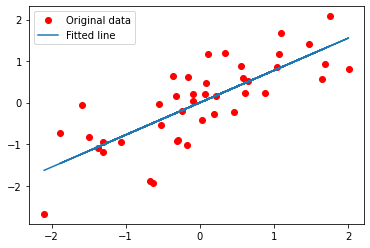

In [25]:
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, sess.run(W) * x_train + sess.run(B), label='Fitted line')
plt.legend()
plt.show();

In [26]:
sess.close()